In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("train.csv")
df_train.drop(["Name","Ticket","Fare","Cabin","PassengerId","Embarked"],axis = "columns",inplace = True)
df_train.dropna(inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


# Survival Based On Sex of the Passenger

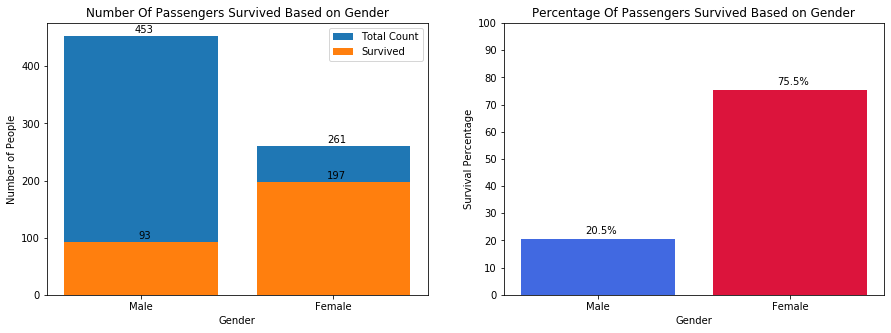

In [2]:


def autolabel(rects,x, n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 3),textcoords="offset points",ha='center', va='bottom')
def autolabel1(rects,x, n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 1),textcoords="offset points",ha='center', va='bottom')

        
x_sex = df_train["Sex"].unique()
x_sex = [sex.title() for sex in x_sex]
total_male, total_female = df_train["Sex"].value_counts()

male_survived = (df_train.loc[(df_train["Sex"] == "male") & (df_train["Survived"] == 1)]).shape[0]
female_survived = (df_train.loc[(df_train["Sex"] == "female") & (df_train["Survived"] == 1)]).shape[0]
sexwise_survied = [male_survived, female_survived]
percent_survived = [(sexwise_survied[0]/total_male*100),(sexwise_survied[1]/total_female*100)] 

#Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].set_title("Number Of Passengers Survived Based on Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of People")
barplot1 = axes[0].bar(x_sex,[total_male,total_female],label = "Total Count")
barplot2 = axes[0].bar(x_sex,sexwise_survied,label = "Survived")

axes[1].set_title("Percentage Of Passengers Survived Based on Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Survival Percentage")
barplot3 = axes[1].bar(x_sex,percent_survived,color = ["royalblue","crimson"])
axes[1].set_yticks(range(0,101,10))
axes[0].legend(loc = "upper right")

autolabel1(barplot1,3,0)
autolabel1(barplot2,3,0)
autolabel(barplot3,3, 1)
plt.show()

## From the above analysis, we may conclude that,
**1. Females had a better survival chance than males.**

# Survival Based on Passenger Class

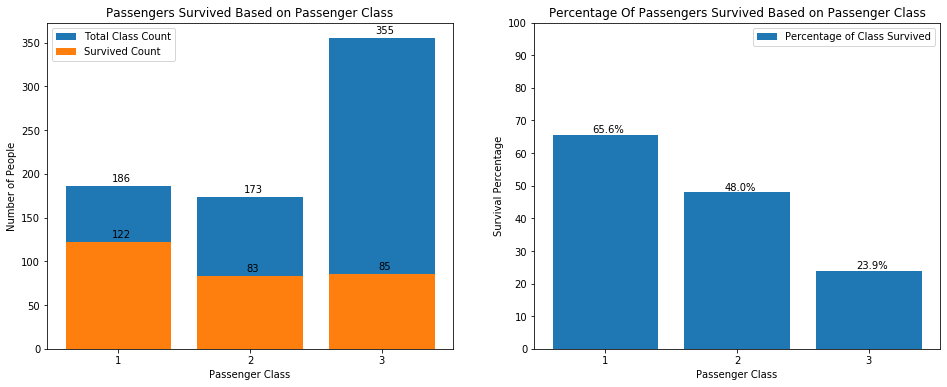

From the above analysis, we can say that
1. The chances of survival of Class 1 are maximum, which is 65.6%
2. Tho Class 3 passengers are maximum in number, their survival chances are the least i.e. 23.9%



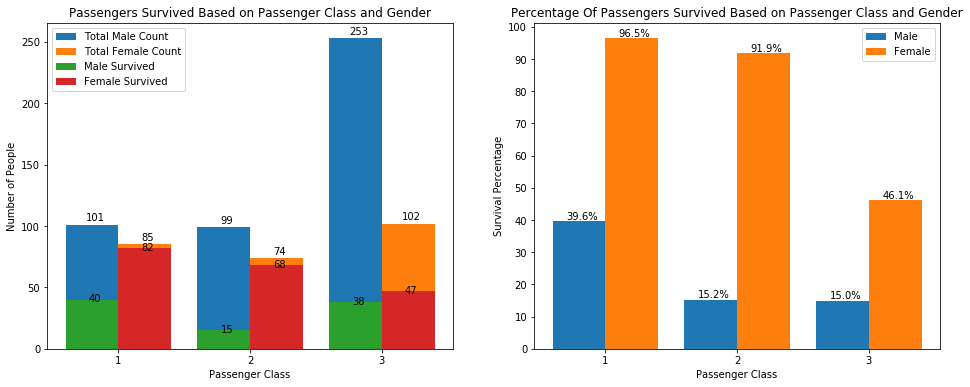

In [3]:


def autolabel(rects,x,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 0),textcoords="offset points",ha='center', va='bottom')
def autolabel1(rects,x,y,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, y),textcoords="offset points",ha='center', va='bottom')
        

classwise_males,classwise_females,classwise_females_surv,classwise_males_surv =[],[],[],[]
classwise_percent_male_survived,classwise_percent_female_survived,classwise_survived,classwise_surv_per = [],[],[],[]
df_class = df_train.sort_values(by = "Pclass")
x_class = (df_class["Pclass"].unique())

x_sex = df_class["Sex"].unique()
x_sex = [sex.title() for sex in x_sex]
class3_total,class1_total,class2_total = df_class["Pclass"].value_counts()
classwise_total = [class1_total,class2_total,class3_total]

df_new = df_class.set_index("Pclass")

#To get total number and survived number of males and females acc to class
for num in range(1,4):
    classwise_males.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "male")]).shape[0])
    classwise_females.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "female")]).shape[0])
    classwise_males_surv.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "male") & df_new["Survived"] == 1]).shape[0])
    classwise_females_surv.append((df_new.loc[(df_new.index == num) & (df_new["Sex"] == "female")& df_new["Survived"] == 1]).shape[0])
#To get percentage of survived number of males and females acc to class
    classwise_percent_male_survived.append(round(classwise_males_surv[-1]/classwise_males[-1]*100,1))
    classwise_percent_female_survived.append(round(classwise_females_surv[-1]/classwise_females[-1]*100,1))

#To get survived number of people acc to passenger class
for num in range(1,4):
    classwise_survived.append((df_new.loc[(df_new.index == num) & df_new["Survived"] == 1]).shape[0])
    classwise_surv_per.append(round(classwise_survived[-1]/classwise_total[num-1]*100,1))

#Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

axes[0].set_title("Passengers Survived Based on Passenger Class")
axes[0].set_xlabel("Passenger Class")
axes[0].set_ylabel("Number of People")
count_bar_tot = axes[0].bar(x_class,classwise_total,label = "Total Class Count")
count_bar_sur = axes[0].bar(x_class,classwise_survived,label = "Survived Count")
axes[0].set_xticks(range(1,4,1))
axes[0].legend()

axes[1].set_title("Percentage Of Passengers Survived Based on Passenger Class")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Survival Percentage")
percent_bar = axes[1].bar(x_class,classwise_surv_per,label="Percentage of Class Survived")
axes[1].set_yticks(range(0,101,10))
axes[1].set_xticks(range(1,4,1))
axes[1].legend()

autolabel1(count_bar_tot,3,3,0)
autolabel1(count_bar_sur,3,3,0)
autolabel(percent_bar,3,1)
plt.show()

print("""From the above analysis, we can say that
1. The chances of survival of Class 1 are maximum, which is {:.1f}%
2. Tho Class 3 passengers are maximum in number, their survival chances are the least i.e. {:.1f}%\n"""
     .format(max(classwise_surv_per),min(classwise_surv_per)))

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

axes[0].set_title("Passengers Survived Based on Passenger Class and Gender")
axes[0].set_xlabel("Passenger Class")
axes[0].set_ylabel("Number of People")
male_to = axes[0].bar(x_class-0.2,classwise_males,width=0.4,label = "Total Male Count")
female_to = axes[0].bar(x_class+0.2,classwise_females,width=0.4,label = "Total Female Count")
male_su = axes[0].bar(x_class-0.2,classwise_males_surv,width=0.4,label = "Male Survived")
female_su = axes[0].bar(x_class+0.2,classwise_females_surv,width=0.4,label = "Female Survived")
axes[0].set_xticks(range(1,4,1))
axes[0].legend(loc = "upper left")


axes[1].set_title("Percentage Of Passengers Survived Based on Passenger Class and Gender")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Survival Percentage")
male_bar = axes[1].bar(x_class-0.2,classwise_percent_male_survived,width=0.4,label = "Male")
female_bar = axes[1].bar(x_class+0.2,classwise_percent_female_survived,width=0.4,label = "Female")
axes[1].set_yticks(range(0,101,10))
axes[1].set_xticks(range(1,4,1))
axes[1].legend()



autolabel1(male_su,3,-4,0)
autolabel1(female_su,3,-4,0)
autolabel1(male_to,3,2,0)
autolabel1(female_to,3,2,0)
autolabel(male_bar,3,1)
autolabel(female_bar,3,1)
plt.show()


## From the above we can conclude that,
**1. Chances of survival of passengers of Class 1 is greater than Class 2, while Class 3 passengers have least survival percentage.**</br>
**2. The chances of survival of females is far more greater than males.**

# Survival Based on Age of Passenger

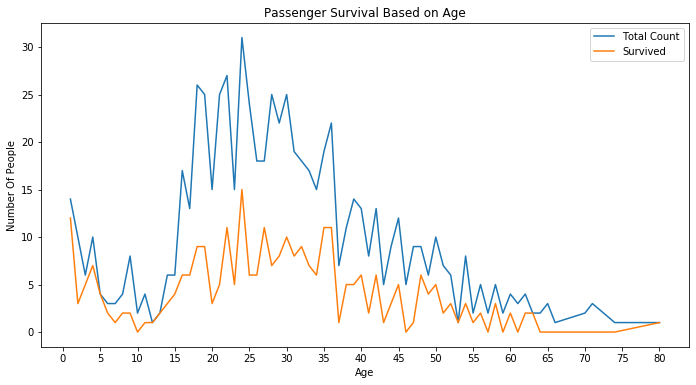

,0,1,2,3,4
Age Group,0-16,16-32,32-48,48-64,64-80
Percentage Survived,55.0%,37.0%,40.4%,43.5%,9.1%


In [4]:
from IPython.display import display

df_age = df_train.sort_values(by = ["Age"])

age_lst,agewise_totalcount, agewise_survived, age_rangewise_totalcount, age_rangewise_survived, agewise_range_percent = [], [], [], [], [], []
age_lst = df_age["Age"].apply(np.ceil)
df_age["age"] = age_lst
age_lst = age_lst.unique()
#print(agewise.unique())
#df_age.set_index("Age", inplace = True)
for age in age_lst:
    agewise_survived.append((df_age.loc[(df_age["age"] == age) & (df_age["Survived"] == 1)]).shape[0])
    agewise_totalcount.append(df_age.loc[(df_age["age"] == age)].shape[0])
#print(age_lst)
#print(agewise_totalcount)
#print(agewise_survived)

fig = plt.figure(figsize = (10,5))
axes = fig.add_axes([0.9,0.9,0.9,0.9])
axes.plot(age_lst,agewise_totalcount, label = "Total Count")
axes.plot(age_lst,agewise_survived, label = "Survived")
plt.title("Passenger Survival Based on Age")
plt.xlabel("Age")
plt.ylabel("Number Of People")
plt.legend(loc = "upper right")
plt.xticks(range(0,85,5))
plt.show()

ages_lst = [];i = 0
age_range_lst = [element for element in range(0,81,16)]
for age in age_range_lst[1:]:
    age_rangewise_survived.append((df_age.loc[(df_age["age"] > i) & (df_age["age"] <= age) & (df_age["Survived"] == 1)]).shape[0])
    age_rangewise_totalcount.append(df_age.loc[(df_age["age"] > i) & (df_age["age"] <= age)].shape[0])
    agewise_range_percent.append(age_rangewise_survived[-1]/age_rangewise_totalcount[-1]*100)
    ages_lst.append(("{}-{}".format(i,age)))
    i = age
agewise_range_percent = [str(round(element,1))+"%" for element in agewise_range_percent]
df_percent = pd.DataFrame(zip(ages_lst,agewise_range_percent),columns = ["Age Group","Percentage Survived"]).T
display(df_percent)

## From the above graph, we can draw the following conclusions,
**1. For the age group 0-16, the survival rate is high.**</br>
**2. For the age group 16-32 the survival rate is low.**</br>
**3. For the age group 32-64, the survival rate is moderate.**</br>
**4. For the age group 64-80, the survival rate is very low.**</br>

# Survival Based on Siblings and Spouse Count

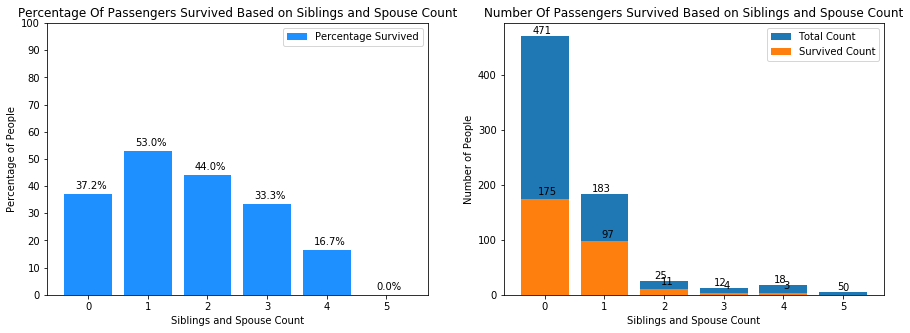

In [5]:
def autolabel(rects,x,y,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, y),textcoords="offset points",ha='center', va='bottom')

def autolabel_percent(rects,x,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 3),textcoords="offset points",ha='center', va='bottom')

total_count, survived_count, percent_survived = [], [], []

df_sib = df_train.sort_values(by = ["SibSp"])
df_sib.drop(["Age", "Pclass", "Sex", "Parch"], axis = 1, inplace = True)
x_sib = df_sib["SibSp"].unique()

for sibsp in x_sib:
    total_count.append((df_sib.loc[df_sib["SibSp"] == sibsp]).shape[0])
    survived_count.append((df_sib.loc[(df_sib["SibSp"] == sibsp) & (df_sib["Survived"] == 1)]).shape[0])
    percent_survived.append(survived_count[-1]/total_count[-1]*100) 

fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))

axes[0].set_title("Percentage Of Passengers Survived Based on Siblings and Spouse Count")
axes[0].set_xlabel("Siblings and Spouse Count")
axes[0].set_ylabel("Percentage of People")
plot1 = axes[0].bar(x_sib,percent_survived, label = "Percentage Survived", color = "dodgerblue")
axes[0].set_yticks(range(0,101,10))
axes[0].legend(loc = "upper right")

axes[1].set_title("Number Of Passengers Survived Based on Siblings and Spouse Count")
axes[1].set_xlabel("Siblings and Spouse Count")
axes[1].set_ylabel("Number of People")
plot2 = axes[1].bar(x_sib,total_count, label = "Total Count")
plot3 = axes[1].bar(x_sib, survived_count, label = "Survived Count")
axes[1].legend(loc = "upper right")

autolabel_percent(plot1, 3, 0)
autolabel(plot2,-3, 0, 1)
autolabel(plot3,3, 2, 1)
plt.show()

## From the above. we may say that,
**1. The Siblings and Spouse Count does not show any impact on Survival of Passengers.**

# Survival Based on Children and Parent Count

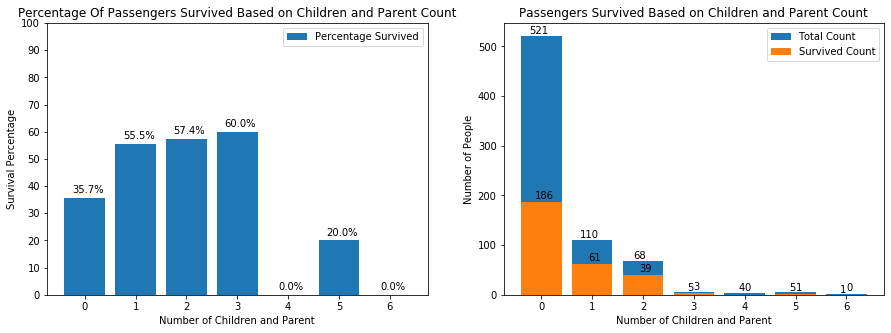

In [6]:
def autolabel(rects,x,y,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.0f}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, y),textcoords="offset points",ha='center', va='bottom')

def autolabel_percent(rects,x,n):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes[n].annotate('{:.1f}%'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(x, 3),textcoords="offset points",ha='center', va='bottom')

total_count, survived_count, percent_survived = [], [], []

df_parch = df_train.sort_values(by = ["Parch"])
df_parch.drop(["Age", "Pclass", "Sex", "SibSp"], axis = 1, inplace = True)
x_parch = df_parch["Parch"].unique()

for parch in x_parch:
    total_count.append((df_parch.loc[df_parch["Parch"] == parch]).shape[0])
    survived_count.append((df_parch.loc[(df_parch["Parch"] == parch) & (df_parch["Survived"] == 1)]).shape[0])
    percent_survived.append(survived_count[-1]/total_count[-1]*100) 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].set_title("Percentage Of Passengers Survived Based on Children and Parent Count")
axes[0].set_xlabel("Number of Children and Parent")
axes[0].set_ylabel("Survival Percentage")
plot1 = axes[0].bar(x_parch,percent_survived, label = "Percentage Survived")
axes[0].set_yticks(range(0,101,10))
axes[0].legend()

axes[1].set_title("Passengers Survived Based on Children and Parent Count")
axes[1].set_xlabel("Number of Children and Parent")
axes[1].set_ylabel("Number of People")
plot2 = axes[1].bar(x_parch,total_count, label = "Total Count")
plot3 = axes[1].bar(x_parch, survived_count, label = "Survived Count")
axes[1].legend(loc = "upper right")

autolabel_percent(plot1, 3, 0)
autolabel(plot2,-3, 0, 1)
autolabel(plot3,3, 2, 1)
plt.show()

## From the above. we may say that,
**1. The Children and Parent Count does not show any impact on Survival of Passengers.**

## CONCLUSION

*From all of the above analysis, we can conlcude that a passenger has the maximum probability of survival if:*</br>
**1. That person is a female** </br>
**2. If he/she is a First Class Passenger**</br>
**3. Is aged between 0-16 or 48-64** *</br>

### Training dataset for selection of Best Predictive Model

In [7]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer
import pandas as pd


df_train = pd.read_csv("train.csv")
df_train_set = df_train.drop(["Name","Ticket","Fare","Cabin","PassengerId","Embarked","SibSp","Parch"],axis = "columns")
df_train_set.dropna(inplace=True)

df_test = pd.read_csv("test.csv")
df_test_set = df_test.drop(["Name","Ticket","Fare","Cabin","Embarked","SibSp","Parch"], axis = 1)
df_ytest = pd.read_csv("gender_submission.csv")
df_test_set["Survived"] = df_ytest["Survived"]
df_test_set.dropna(how = 'any',axis = 0, inplace = True)
df_test_set.reset_index(drop = True, inplace = True)
#To predict if passengers have survived or not.
df_test_pred = df_test_set


df_test = df_test_set.drop("PassengerId", axis = 1)
x_train = df_train_set.drop("Survived", axis = 1).values

y_train = df_train_set["Survived"]
x_test = df_test.drop("Survived", axis = 1).values
y_test = df_test["Survived"]

ct = ColumnTransformer([('',ohe(),[1])],remainder = "passthrough")
x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

score_lst, conf_mat_lst = [], []
models = ["Linear Regression", "Logistic Regression", "Decision Tree Classifier-Gini", "Decision Tree Classifier-Entropy", "Select Vector Machines [rbf, C=20]", "Select Vector Machines [rbf, C=10]", "Random Forest Classifier", "Decision Tree Regressor"]
model_lst = [LinearRegression(),LogisticRegression(),DecisionTreeClassifier(criterion = "gini"),DecisionTreeClassifier(criterion = "entropy"),SVC(gamma = "auto",C =20,kernel="rbf"),SVC(gamma = "auto",C =10,kernel="rbf"),RandomForestClassifier(n_estimators = 10),DecisionTreeRegressor(criterion = "mse")]

for mdl_name in model_lst:
    model = mdl_name
    model.fit(x_train,y_train)
    score_lst.append(model.score(x_test, y_test))
    try:
        y_pred = model.predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        conf_mat = [[tn,fp],[fn,tp]]
        conf_mat_lst.append(conf_mat)
    except ValueError:
        conf_mat_lst.append("NA")
        
df_models = pd.DataFrame(zip(models,score_lst), columns = ["Model Name","Accuracy"])
df_models["Confusion Matrix"] = conf_mat_lst
df_models.sort_values(by = "Accuracy", ascending = False, inplace = True)
df_models.reset_index(inplace = True)
df_models.drop("index",axis = 1, inplace = True)
display(df_models)

,Model Name,Accuracy,Confusion Matrix
0,Logistic Regression,0.918675,"[[188, 17], [10, 117]]"
1,"Select Vector Machines [rbf, C=20]",0.852410,"[[181, 24], [25, 102]]"
2,"Select Vector Machines [rbf, C=10]",0.846386,"[[181, 24], [27, 100]]"
3,Random Forest Classifier,0.843373,"[[175, 30], [22, 105]]"
4,Decision Tree Classifier-Gini,0.825301,"[[176, 29], [29, 98]]"
5,Decision Tree Classifier-Entropy,0.825301,"[[176, 29], [29, 98]]"
6,Linear Regression,0.668927,NA
7,Decision Tree Regressor,0.401336,NA


###  From above analysis, the Best model for prediction of data is **Logistic Regression**.

In [9]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Deploying the model 

In [10]:
import joblib

#Creating a new model
joblib.dump(model_lr,"Titanic_model")


['Titanic_model']

### Implementing the model

In [13]:
from IPython.display import display

titanic_mdl = joblib.load("Titanic_model")

#Female, Class1, Age = 19 
pred1 = titanic_mdl.predict([[1.0,0.0, 1, 19.0]])
print("Passenger1: Female, Class 1, Age=19, Survived =",pred1[0])

#Male, Class 3, Age = 25
pred2 = titanic_mdl.predict([[0.0,1.0, 3, 25.0]])
print("Passenger2: Male, Class 3, Age=25, Survived =",pred2[0])

# Or Prediction of all Test Dataset
print("\nThe Prediction Model for all Passengers of Test Dataset")
prediction = titanic_mdl.predict(x_test)
df_test_pred["Survived"] = prediction

pd.set_option("display.max_rows", 332)
display(df_test_pred)

Passenger1: Female, Class 1, Age=19, Survived = 1
Passenger2: Male, Class 3, Age=25, Survived = 0

The Prediction Model for all Passengers of Test Dataset


,PassengerId,Pclass,Sex,Age,Survived
0,892,3,male,34.50,0
1,893,3,female,47.00,0
2,894,2,male,62.00,0
3,895,3,male,27.00,0
4,896,3,female,22.00,1
5,897,3,male,14.00,0
6,898,3,female,30.00,1
7,899,2,male,26.00,0
8,900,3,female,18.00,1
9,901,3,male,21.00,0
